## Step 1: Reading and Understanding the Data

In [279]:
# Import necessary libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for creating visualizations
import seaborn as sns  # Seaborn for statistical data visualization

# Suppress warnings to enhance code readability
import warnings
warnings.filterwarnings('ignore')  # Ignore warning messages during execution


In [280]:
# Read the CSV file "day.csv" into a Pandas DataFrame named 'df'
df = pd.read_csv("day.csv")


In [281]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [283]:
#checking for null values in dataset
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Dropping columns not required for modeling

### 1. Instant: Indicates row number, not required
### 2. Casual and Registered: As our dependent variable is a count
### 3. The columns 'dteday' and 'yr month' contain the same data. To avoid confusion, we can drop the 'dteday' column.


According to the problem statement, the dependent variable we should focus on is the total number of bike rentals, which is represented by the 'cnt' variable. The statement mentions:

"The variable 'casual' indicates the number of casual users who have made a rental. The variable 'registered,' on the other hand, shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable."


In [284]:
df.drop(columns=["instant","casual","registered","dteday"],inplace=True)

In [285]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [287]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [288]:
df.shape

(730, 12)

In [289]:
# Checking Correlation
df[['temp','atemp','hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


When the correlation between two features is close to 1 (or -1), it indicates high similarity, and dropping one of the highly correlated features is advisable for several reasons:

- **Redundancy:** Highly correlated features convey the same information, leading to redundancy. Including both may not provide additional benefits and can result in multicollinearity issues.

- **Simplicity and Interpretability:** A model with fewer features is simpler and more interpretable. Redundant features do not add value and can complicate the interpretation of the model's behavior.

- **Computational Efficiency:** Training and running a model with fewer features are often computationally more efficient, particularly with large datasets.

- **Avoiding Overfitting:** Including highly correlated features may contribute to overfitting, where the model fits the training data too closely and struggles to generalize to new, unseen data.

## Hence dropping Atemp column too.

In [290]:
# Drop the column "atemp" from the DataFrame 'df'
df.drop(columns=["atemp"], inplace=True)


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


## Dealing with Categorical Values As mentioned in Problem Statemet : 

we can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. 

In [292]:
df['season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['mnth'] = df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df['weekday'] = df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df['weathersit'] = df['weathersit'].map({
    1: 'Clear',
    2: 'Cloudy_mist',
    3: 'Light_Rain_Thunder',
    4: 'Heavy_Rain_thunder'
})


In [293]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Cloudy_mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Cloudy_mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


## Step 2: Visualising the Data

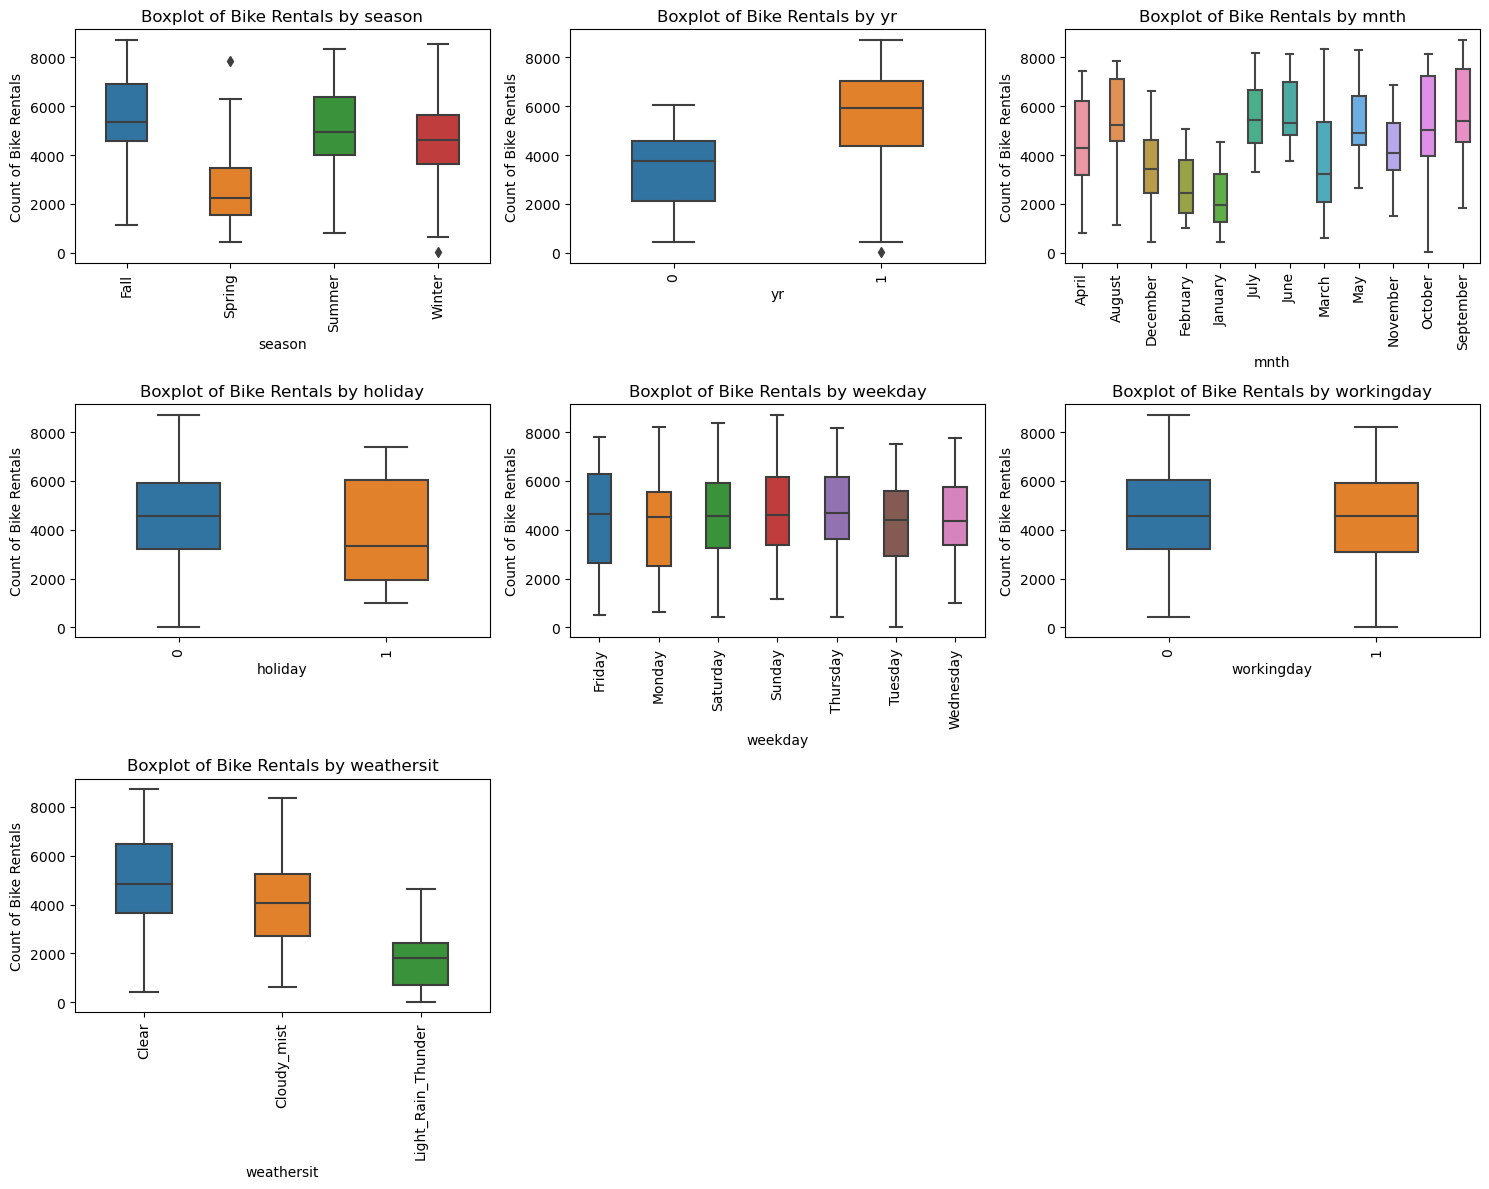

In [295]:
# visualizing variables
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(15, 12))
for i, cat_var in enumerate(cat_vars, 1):
    plt.subplot(3, 3, i)
    df_boxplot = df[['cnt', cat_var]].copy()
    df_boxplot[cat_var] = df[cat_var].astype('category')
    
    sns.boxplot(x=cat_var, y='cnt', data=df_boxplot, width=0.4)
    plt.title(f'Boxplot of Bike Rentals by {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Count of Bike Rentals')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


1. **Seasonal Analysis:** 
     - Fall has the highest average rentals, followed closely by summer.
2. **Year-wise Rentals:**
   - 2019 sees a notable increase with a median rise of approximately 2000 rentals compared to 2018.
3. **Monthly Trend:**
   - September tops the monthly rental count, with surrounding months showing substantial demand.
   - The trend aligns with seasonal patterns, indicating a correlation between rentals and seasons.
4. **Holiday vs. Working Days:**
   - Holidays generally result in lower rental counts compared to working days.
   - Holidays exhibit greater variability in rental demand.
5. **Weekday Analysis:**
   - Overall, no significant difference in rentals across weekdays is observed.
   - Thursdays and Sundays stand out with higher variability in rental counts compared to other weekdays.


### Checking outlier In Spring as we saw in boxplot. Median is around 2000 and 7000> seems like an outlier so we can drop this one row.

In [296]:
# Select rows from DataFrame 'df' where the season is "Spring" and cnt is greater than 7000
df_filtered = df[(df['season'] == 'Spring') & (df['cnt'] > 7000)]


In [297]:
df.shape

(730, 11)

In [298]:
# Dropping cnt > 7000 for spring
df.drop(df[(df.season == "Spring") & (df.cnt > 7000)].index,inplace=True)

In [299]:
# Dropped one row where season was spring and cnt was greater > 7000
df.shape

(729, 11)

## Understanding Correlation among categorical and numerical values  

<Axes: >

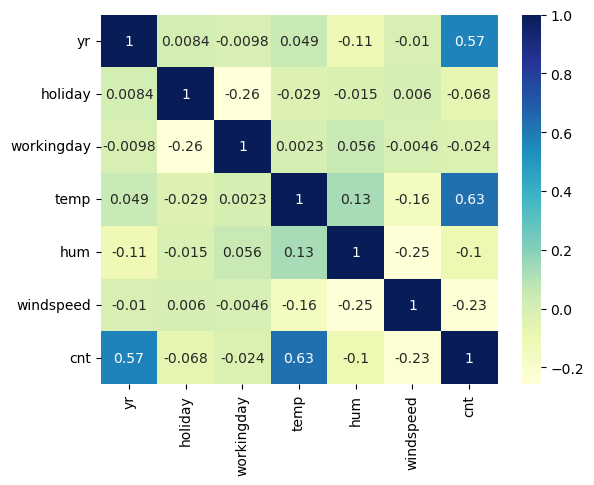

In [300]:
# Checking correlation
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

### Highest correlation with `cnt` is seen in `temp` followed by `yr`.


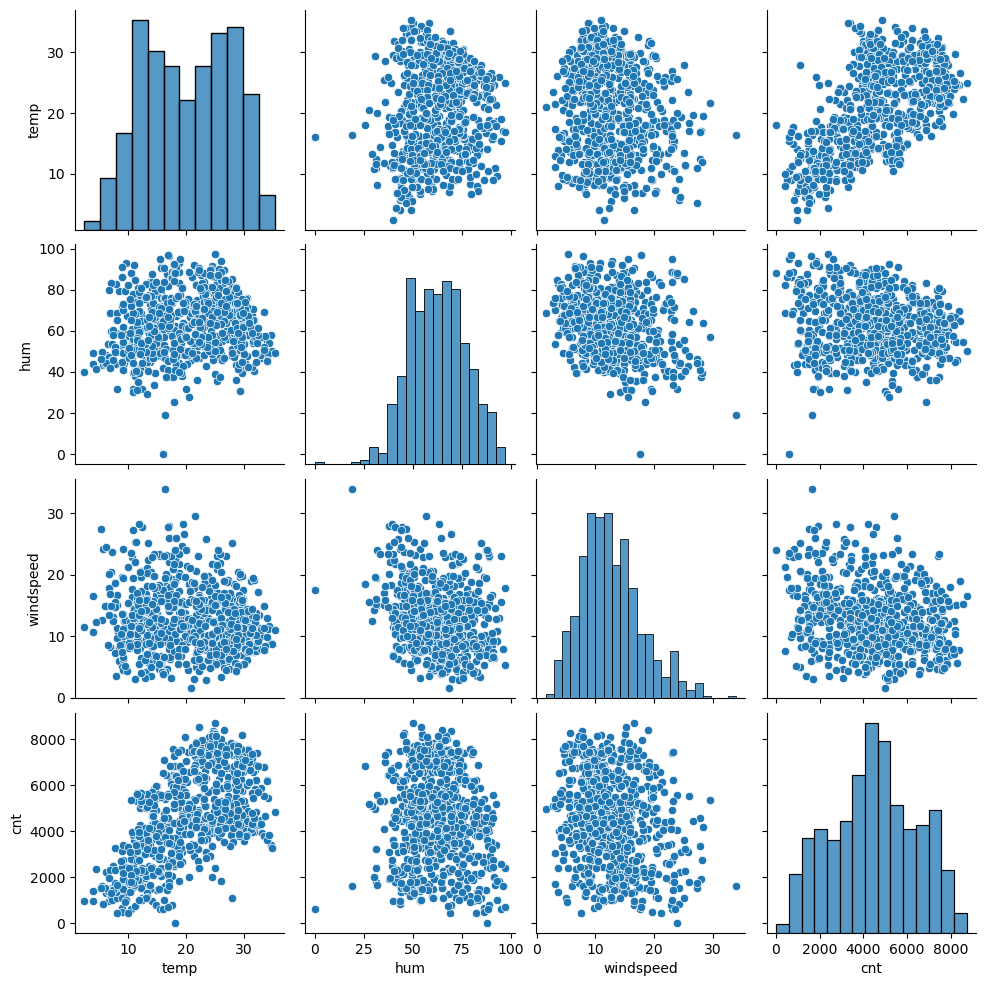

In [301]:
sns.pairplot(df,vars=["temp","hum","windspeed","cnt"])

## Step 3: Data Preparation
### Let's Prepare data using pd.get_dummies

In [302]:
# creating idummy variables
season_dum = pd.get_dummies(df['season'],drop_first=True)
mnth_dum = pd.get_dummies(df['mnth'],drop_first=True)
weekday_dum = pd.get_dummies(df['weekday'],drop_first=True)
weathersit_dum = pd.get_dummies(df['weathersit'],drop_first=True)

In [303]:
# Adding indicator variable columns to the dataset . Dropping original columns
df = pd.concat([df,season_dum,mnth_dum,weekday_dum,weathersit_dum],axis=1)
df.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [304]:
df.shape

(729, 29)

In [305]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 4: Splitting the Data into Training and Testing Sets

In [306]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(30)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [307]:
df_train.shape

(510, 29)

In [308]:
df_test.shape

(219, 29)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see thatall the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As we know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [309]:
# Import the MinMaxScaler class from scikit-learn for feature scaling
from sklearn.preprocessing import MinMaxScaler


In [310]:
# Create an instance of the MinMaxScaler class
scaler = MinMaxScaler()

In [311]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = num_vars = ['temp','hum','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [312]:
# Checking 5 columns 
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
626,1,0,1,0.614763,0.553027,0.371638,7591,0,0,0,...,0,1,0,0,0,1,0,0,0,0
363,0,0,0,0.314673,0.656076,0.197852,2999,1,0,0,...,0,0,0,0,1,0,0,0,0,0
425,1,0,0,0.366591,0.677114,0.220569,3194,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [313]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.509804,0.021569,0.709804,0.539048,0.648381,0.315400,4517.092157,0.241176,0.245098,0.24902,...,0.082353,0.086275,0.156863,0.135294,0.135294,0.141176,0.141176,0.133333,0.343137,0.027451
std,0.500395,0.145413,0.454298,0.227284,0.145999,0.170073,1968.461206,0.428217,0.430568,0.43287,...,0.275172,0.281045,0.364028,0.342373,0.342373,0.348545,0.348545,0.340268,0.475223,0.163554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336738,0.538643,0.195527,3132.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545711,0.649205,0.285417,4540.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.739627,0.755904,0.406426,6111.750000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


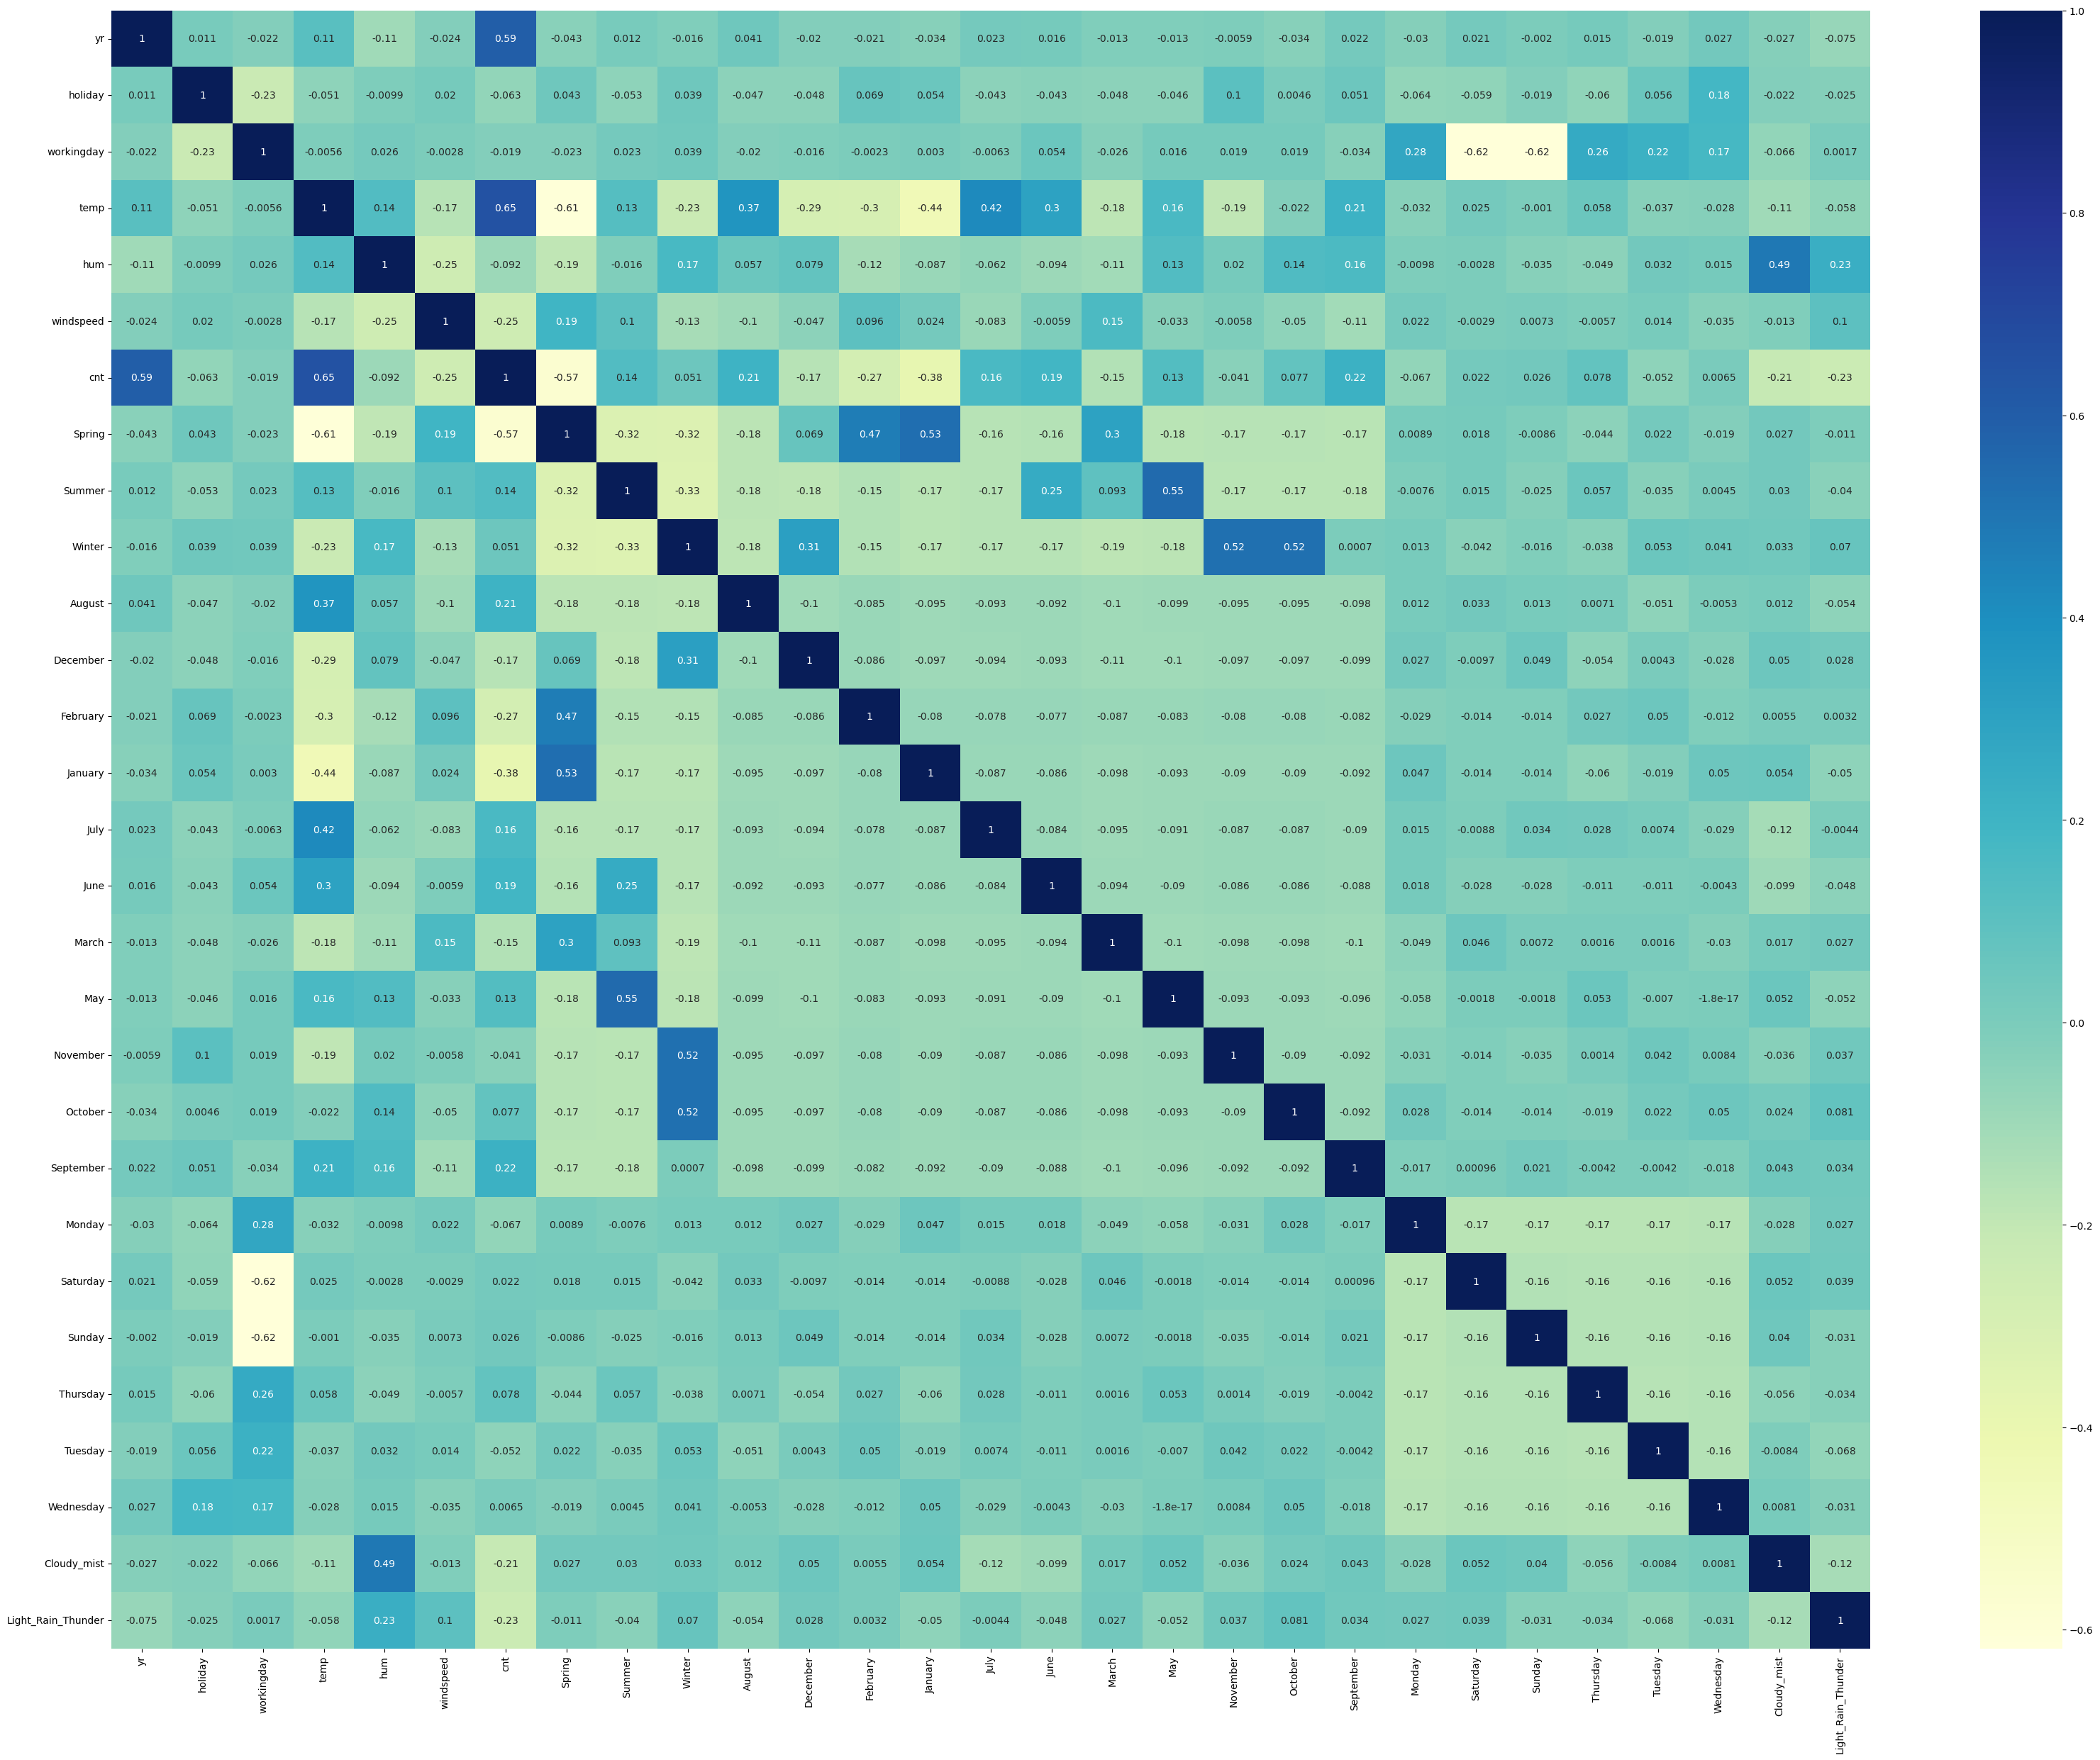

In [314]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From above we can also figure out how certain variables such as CNT, specifics Month are higly correlated. Lets build the model and check it out

### Dividing into X and Y sets for the model building

In [315]:
# Separating the target variable "cnt" from the features in the training data
y_train = df_train.pop("cnt")
x_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`.In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

# Model 1: Linear regression

In [316]:
# Import the statsmodels library
import statsmodels.api as sm

# Add a constant column to the DataFrame 'x_train' containing only the "temp" feature
x_train_lm = sm.add_constant(x_train[["temp"]])

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr = sm.OLS(y_train, x_train_lm).fit()


In [317]:
lr.params

const    1479.084302
temp     5635.880972
dtype: float64

In [318]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     373.1
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           9.67e-63
Time:                        14:13:28   Log-Likelihood:                -4451.1
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8915.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1479.0843    170.662      8.667      0.0

### Adding all variable

The R-squared value obtained is `0.423`. Since we have so many variables, we can clearly do better than this. So let us add some other variables to identify

In [319]:
x_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

# Model 2: Multiiple linear regression model 

In [320]:
# Add a constant column to the DataFrame 'x_train' using statsmodels
x_train_lm = sm.add_constant(x_train)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_2 = sm.OLS(y_train, x_train_lm).fit()


In [321]:
mlr_2.params

const                 2309.801461
yr                    1989.541251
holiday                 36.034037
workingday             687.407525
temp                  3858.627483
hum                  -1550.733675
windspeed            -1400.329449
Spring                -543.358327
Summer                 303.299176
Winter                 879.109163
August                 192.152873
December              -331.792185
February              -242.216125
January               -390.720691
July                  -329.378819
June                    82.765046
March                   73.692385
May                    319.871667
November              -364.664031
October                165.542027
September              775.447312
Monday                -196.645605
Saturday               721.907368
Sunday                 766.477924
Thursday                36.860826
Tuesday               -192.138758
Wednesday              -49.776395
Cloudy_mist           -535.468660
Light_Rain_Thunder   -1946.476054
dtype: float64

In [322]:
print(mlr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          8.20e-186
Time:                        14:13:28   Log-Likelihood:                -4089.7
No. Observations:                 510   AIC:                             8237.
Df Residuals:                     481   BIC:                             8360.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2309.8015    903

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [323]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [324]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,73.65
3,temp,44.50
4,hum,41.80
21,Saturday,14.26
22,Sunday,13.52
6,Spring,12.71
8,Winter,10.99
7,Summer,9.75
17,November,6.71
9,August,6.60


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

# Next step :
It can be seen some variables have very high `VIF` values and high `p_value` so its better to use RFE recursive feature elimination to decide the best variables

In [325]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

# Running RFE with the output number of variables equal to 10
lm = LinearRegression()
lm.fit(x_train, y_train)

# Assuming X_train is your feature matrix
rfe = RFE(lm,n_features_to_select=20)              
rfe = rfe.fit(x_train, y_train)


In [326]:
rfe_table=pd.DataFrame(list(zip(x_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)

,Feature,support,Rank
0,yr,True,1
22,Sunday,True,1
21,Saturday,True,1
20,Monday,True,1
19,September,True,1
17,November,True,1
16,May,True,1
26,Cloudy_mist,True,1
12,January,True,1
11,February,True,1


In [327]:
# selecting columns based of RFE
selected_features= x_train.columns[rfe.support_]
selected_features

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'December', 'February', 'January', 'July', 'May', 'November',
       'September', 'Monday', 'Saturday', 'Sunday', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

In [328]:
#Selecting selected feature for model creation
x_train_rfe = x_train[selected_features]

In [329]:
x_train_rfe.head()

,yr,workingday,temp,hum,windspeed,Spring,Summer,Winter,December,February,January,July,May,November,September,Monday,Saturday,Sunday,Cloudy_mist,Light_Rain_Thunder
626,1,1,0.614763,0.553027,0.371638,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
363,0,0,0.314673,0.656076,0.197852,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
425,1,0,0.366591,0.677114,0.220569,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
728,1,1,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0


# Model 3: using RFE
### Adding Selected  variables to the model

In [330]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_3 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     149.0
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          2.40e-193
Time:                        14:13:29   Log-Likelihood:                -4091.9
No. Observations:                 510   AIC:                             8226.
Df Residuals:                     489   BIC:                             8315.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2391.2036    407

#### Checking VIF

In [331]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.51
2,temp,23.54
1,workingday,23.45
5,Spring,6.18
16,Saturday,5.23
17,Sunday,5.06
4,windspeed,4.95
7,Winter,4.22
6,Summer,3.77
18,Cloudy_mist,2.41


# Model 4: 
##### Removing the variable `hum` based on its Very High 'VIF' value.

In [332]:
# Drop the column "hum" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["hum"], axis=1, inplace=True)


In [333]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_4 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.7
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          1.80e-189
Time:                        14:13:29   Log-Likelihood:                -4103.9
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     490   BIC:                             8333.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1593.2510    381

In [334]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,21.18
2,temp,15.89
4,Spring,5.67
15,Saturday,4.89
3,windspeed,4.81
16,Sunday,4.68
6,Winter,3.68
5,Summer,3.54
9,January,2.23
0,yr,2.09


# Model 5: 
##### Removing the variable `workingday` based on its Very High 'VIF' value.

In [335]:
# Drop the column "workingday" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["workingday"], axis=1, inplace=True)


In [336]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_5 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     154.2
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          8.93e-189
Time:                        14:13:29   Log-Likelihood:                -4108.2
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     491   BIC:                             8335.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2333.5111    285

In [337]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.69
2,windspeed,4.65
3,Spring,4.35
5,Winter,2.88
4,Summer,2.81
8,January,2.12
0,yr,2.09
7,February,1.87
11,November,1.75
10,May,1.63


# Model 6: 
##### Removing the variable `Summer` based on its Very High 'p' value.

In [338]:
# Drop the column "Summer" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["Summer"], axis=1, inplace=True)


In [339]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_6 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_6.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     163.2
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          1.22e-189
Time:                        14:13:30   Log-Likelihood:                -4108.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     492   BIC:                             8330.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2524.6198    222

In [340]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.47
2,windspeed,4.06
3,Spring,3.85
4,Winter,2.59
7,January,2.12
0,yr,2.07
6,February,1.87
10,November,1.75
5,December,1.62
15,Cloudy_mist,1.56


# Model 7: 
##### Removing the variable `Monday` based on its Very High 'p' value.

In [341]:
# Drop the column "Monday" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["Monday"], axis=1, inplace=True)


In [342]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_7 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_7.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          1.84e-190
Time:                        14:13:30   Log-Likelihood:                -4109.6
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     493   BIC:                             8325.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2492.3537    221

In [343]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.33
2,windspeed,4.04
3,Spring,3.84
4,Winter,2.58
7,January,2.11
0,yr,2.07
6,February,1.87
10,November,1.75
5,December,1.62
14,Cloudy_mist,1.56


# Model 8: 
##### Removing the variable `Saturday` based on its Very High 'p' value.

In [344]:
# Drop the column "Saturday" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["Saturday"], axis=1, inplace=True)


In [345]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_8 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_8.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     183.9
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          4.92e-191
Time:                        14:13:30   Log-Likelihood:                -4110.9
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2510.5265    221

In [346]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.22
2,windspeed,4.04
3,Spring,3.82
4,Winter,2.58
7,January,2.11
0,yr,2.07
6,February,1.87
10,November,1.75
5,December,1.62
13,Cloudy_mist,1.55


# Model 9: 
##### Removing the variable `Sunday` based on its Very High 'p' value.

In [347]:
# Drop the column "Sunday" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["Sunday"], axis=1, inplace=True)


In [348]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_9 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_9.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.0
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          1.60e-191
Time:                        14:13:31   Log-Likelihood:                -4112.5
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     495   BIC:                             8319.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2542.2863    221

In [349]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.19
2,windspeed,4.02
3,Spring,3.82
4,Winter,2.58
7,January,2.11
0,yr,2.07
6,February,1.87
10,November,1.75
5,December,1.61
12,Cloudy_mist,1.54


# Model 10: 
##### Removing the variable `May` and `February` based on its Very High 'p' value.

In [350]:
# Drop the columns "May" and "February" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["May", "February"], axis=1, inplace=True)


In [351]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_10 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_10.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     224.5
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          7.52e-192
Time:                        14:13:31   Log-Likelihood:                -4117.3
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     497   BIC:                             8316.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2508.0549    215

In [352]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.74
2,windspeed,4.02
4,Winter,2.45
3,Spring,2.32
0,yr,2.07
8,November,1.73
6,January,1.60
10,Cloudy_mist,1.53
5,December,1.49
7,July,1.37


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions this model only.

# Model 11: 
##### Removing the variable `January` based on its Very High 'p' value.

In [353]:
# Drop the columns "January" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["January"], axis=1, inplace=True)


In [354]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr_11 = sm.OLS(y_train, x_train_lm).fit()

# Print the summary of the regression model
print(mlr_11.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     241.6
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          1.28e-191
Time:                        14:13:31   Log-Likelihood:                -4120.7
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     498   BIC:                             8316.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2349.7216    207

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [355]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_sm = sm.add_constant(x_train_rfe)


In [356]:
# Predict the target variable 'y_train' using the trained regression model 'mlr_11' and the DataFrame 'x_train_sm'
y_train_pred = mlr_11.predict(x_train_sm)


Text(0.5, 0, 'Errors')

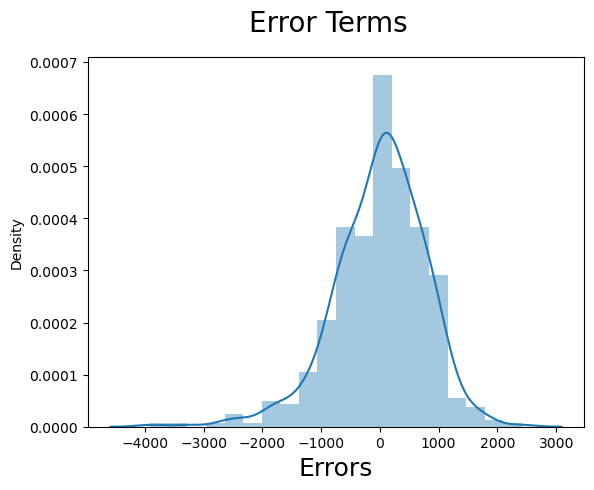

In [357]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Seventh model(mlr_7)

In [358]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = num_vars = ['temp','hum','windspeed']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [359]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.045662,0.648402,0.542041,0.488586,0.430648,4471.652968,0.255708,0.269406,0.232877,...,0.091324,0.073059,0.114155,0.159817,0.155251,0.146119,0.150685,0.164384,0.319635,0.031963
std,0.500513,0.209229,0.478563,0.246069,0.211414,0.184891,1853.207583,0.437258,0.444668,0.423633,...,0.288730,0.260830,0.318728,0.367276,0.362974,0.354034,0.358561,0.371472,0.467403,0.176306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.327372,0.331197,0.297516,3235.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.533865,0.479853,0.412774,4586.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750878,0.629028,0.534298,5635.500000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8227.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [360]:
y_test = df_test.pop('cnt')
x_test = df_test

In [361]:
# Adding constant variable to test dataframe
x_test_mlr_11 = sm.add_constant(x_test)

In [362]:
x_train_rfe.head()

,yr,temp,windspeed,Spring,Winter,December,July,November,September,Cloudy_mist,Light_Rain_Thunder
626,1,0.614763,0.371638,0,0,0,0,0,1,0,0
363,0,0.314673,0.197852,1,0,1,0,0,0,0,0
425,1,0.366591,0.220569,1,0,0,0,0,0,1,0
728,1,0.245101,0.663106,1,0,1,0,0,0,0,0
482,1,0.395666,0.188475,0,0,0,0,0,0,1,0


In [363]:
x_test_mlr_11= x_test_mlr_10[['yr', 'temp', 'windspeed', 'Spring', 'Winter','December','July',"November",'September',
                            'Cloudy_mist', 'Light_Rain_Thunder']]

In [364]:
# checking X_test_mlr_10
x_test_mlr_11.head()

,yr,temp,windspeed,Spring,Winter,December,July,November,September,Cloudy_mist,Light_Rain_Thunder
184,0,0.837241,0.147996,0,0,0,1,0,0,1,0
639,1,0.656765,0.205594,0,1,0,0,0,0,0,1
299,0,0.496221,0.439252,0,1,0,0,0,0,1,0
221,0,0.890387,0.445501,0,0,0,0,0,0,0,0
152,0,0.821739,0.676005,0,0,0,0,0,0,0,0


In [365]:
# Adding constant 
x_test_mlr_11 = sm.add_constant(x_test_mlr_11)

In [366]:
# Making predictions using the fourth model

y_test_pred_mlr_11 = mlr_11.predict(x_test_mlr_11)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred_mlr_11')

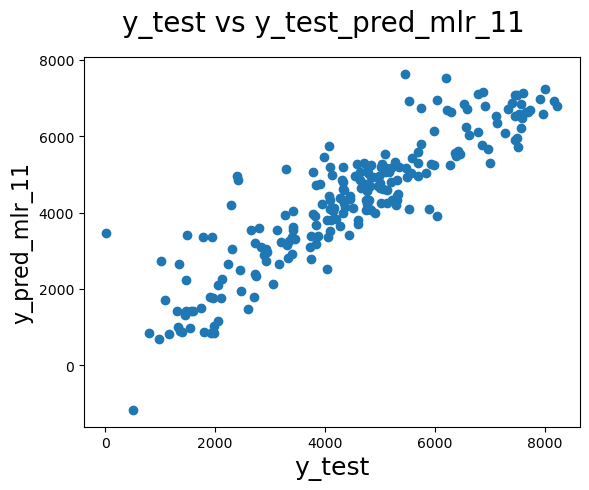

In [367]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_mlr_11)
fig.suptitle('y_test vs y_test_pred_mlr_11', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_mlr_11', fontsize = 16)      

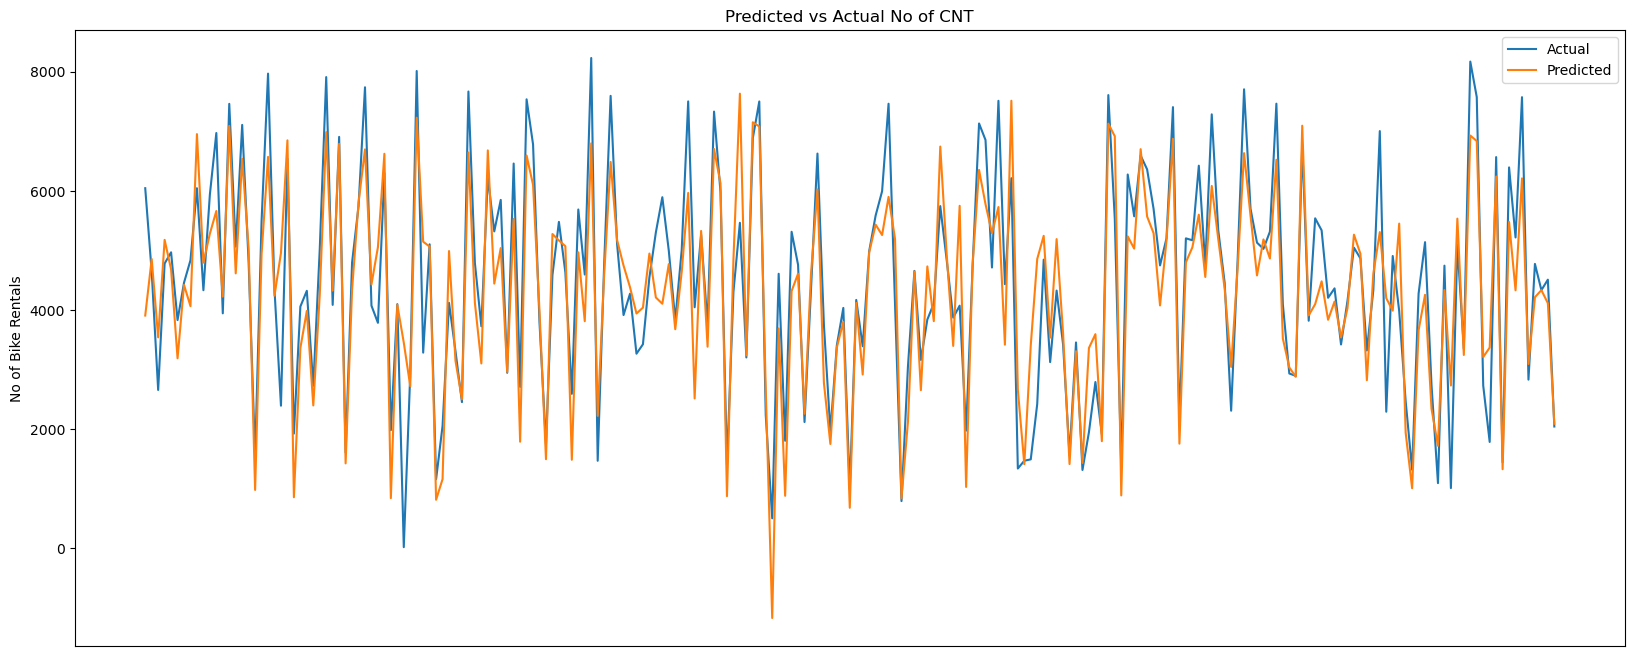

In [368]:
# Plotting Actual vs Predicted 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred_mlr_11)),y_test_pred_mlr_11)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of CNT');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()


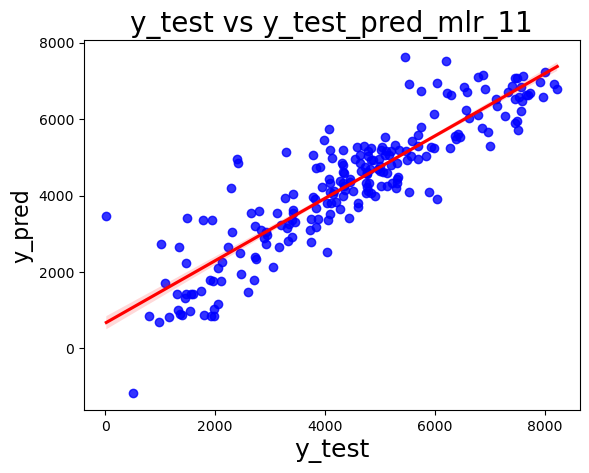

In [369]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred_mlr_11, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred_mlr_11', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [370]:
# CHECKING R SQUARED VALUE FOR TRAIN AND TEST DATA 
from sklearn.metrics import mean_squared_error,r2_score

mse = np.sqrt(mean_squared_error(y_test, y_test_pred_mlr_11))
rsquared_test = r2_score(y_test, y_test_pred_mlr_11)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',rsquared_train)
print('R-squared for test data:',rsquared_test)
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.8421579512778632
R-squared for test data: 0.7912052419702504
Mean Squared Error 844.87


In [371]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_test_pred_mlr_10)
r_squared

0.7912052419702504

In [372]:
mlr_10.params.to_frame()

,0
const,2508.054950
yr,2032.554113
temp,3488.353256
windspeed,-1112.121632
Spring,-1002.099689
Winter,572.579235
December,-462.406257
January,-412.945720
July,-577.136458
November,-550.651779


# Multiple Linear Regression Model Summary

**Dependent Variable:** CNT

**Coefficients:**
- const                  2349.72
- yr                     2030.29
- temp                   3695.86
- windspeed             -1041.56
- Spring                -1082.03
- Winter                  581.50
- December               -372.35
- July                   -616.14
- November               -504.64
- September               421.87
- Cloudy_mist            -766.63
- Light_Rain_Thunder    -2319.49

**Interpretation:**
- The constant term (intercept) is 2349.72.
- The 'yr' (year) variable has a coefficient of 2030.29.
- 'temp' (temperature) has a coefficient of 3695.86.
- 'windspeed' has a coefficient of -1041.56.
- Other variables represent the impact on the dependent variable 'CNT' based on their respective coefficients.

**Regression Equation:**
`CNT` = 2349.72 + 2030.29 * `yr` + 3695.86 * `temp` - 1041.56 * `windspeed` - 1082.03 * `Spring` + 581.50 * `Winter` - 372.35 * `December` - 616.14 * `July` - 504.64 * `November` + 421.87 * `September` - 766.63 * `Cloudy_mist` - 2319.49 * `Light_Rain_Thunder`




# Final Report on Bike Booking Prediction

## Overview

Our final multiple linear regression model aims to predict bike bookings based on a set of predictor variables. After thorough analysis, we have identified the impact of each variable on bike bookings.

## Top Predictor Variables:

1. **Year (yr):**
   - Coefficient: 2030.29
   - Interpretation: A unit increase in the year variable increases the bike hire numbers by 2030.29 units.

2. **Temperature (temp):**
   - Coefficient: 3695.86
   - Interpretation: A unit increase in the temperature variable increases the bike hire numbers by 3695.86 units.

3. **Windspeed:**
   - Coefficient: -1041.56
   - Interpretation: A unit increase in windspeed decreases the bike hire numbers by 1041.56 units.

## Recommendations:

The top three predictor variables that significantly influence bike bookings are as follows:

- **Year (yr):** Focus on understanding and leveraging the increasing trend over the years.

- **Temperature (temp):** Consider the positive impact of temperature on bike bookings and plan activities accordingly.

- **Windspeed:** Be mindful of the negative impact of windspeed on bike bookings and plan strategies to mitigate its effects.

## Next Steps:

For further analysis, it is recommended to explore the following variables:

- **Spring:**
   - Coefficient: -1082.03
   - Interpretation: The Spring season has a negative impact on bike bookings, decreasing them by 1082.03 units.

- **Winter:**
   - Coefficient: 581.50
   - Interpretation: The Winter season has a positive impact on bike bookings, increasing them by 581.50 units.

- **December:**
   - Coefficient: -372.35
   - Interpretation: The month of December has a negative impact on bike bookings, decreasing them by 372.35 units.

- **July:**
   - Coefficient: -616.14
   - Interpretation: The month of July has a negative impact on bike bookings, decreasing them by 616.14 units.

- **November:**
   - Coefficient: -504.64
   - Interpretation: The month of November has a negative impact on bike bookings, decreasing them by 504.64 units.

- **September:**
   - Coefficient: 421.87
   - Interpretation: The month of September has a positive impact on bike bookings, increasing them by 421.87 units.

- **Cloudy_mist:**
   - Coefficient: -766.63
   - Interpretation: Cloudy and misty weather has a negative impact on bike bookings, decreasing them by 766.63 units.

- **Light_Rain_Thunder:**
   - Coefficient: -2319.49
   - Interpretation: Light rain and thunderstorms have a significant negative impact on bike bookings, decreasing them by 2319.49 units.

